Main adaptation: addition of temperature anomaly onto ASF categorisation plot such that key results are more obvious.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as col
import matplotlib.path as mpath
### establish link to python functions
import sys
sys.path.append('/home/156/rm2389/Honours_Thesis/python_functions/')
### import required python functions
from masking import shelf_mask_isobath
import cosima_cookbook as cc
from gsw import SA_from_SP, p_from_z, CT_from_pt, beta, sigma1
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
from dask.distributed import Client
client = Client('tcp://localhost:8786')
client
import cmocean.cm as cmo
from matplotlib import rc
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size':22})
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

netcdf_index loaded.


In [14]:
from spatial_averaging import month_weights


In [29]:
rc('text', usetex=True)
rc('xtick', labelsize=30) 
rc('ytick', labelsize=30) 
rc('axes', labelsize=30) 

In [2]:
## data required for lat/lon mapping and bathymetry contours
ht = cc.get_nc_variable('/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_freshRCP45','ocean_grid.nc','ht', n=1)
ht = ht.sel(yt_ocean = slice(-90,-55))
land_mask = np.squeeze(ht.values)
land_mask = land_mask * 0
land_mask[np.isnan(land_mask)] = 1
yt_ocean =ht.yt_ocean.values
xt_ocean =ht.xt_ocean.values
ht_shelf , shelf_mask = shelf_mask_isobath(ht)

Using database sqlite:////g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_freshRCP45/cosima-cookbook.db


In [3]:
## define the longitude and latitude values for the stangard north-south transects
transect_lons = [75,75,70,70,65,65,60,60,55,55,51,51,45,45,40,40,35,35,30,30,25,25,15,15,10,10,5,5,-5,-5,-10,-10,-15,-15,-22.5,-22.5,-30,-30,-35,-35,-40,-40,-45,-45,-50,-50,-85,-85,-90,-90,-95,-95,-100,-100,-105,-105,-110,-110,-115,-115,-120,-120,-125,-125,-130,-130,-135,-135,-140,-140,-145,-145,-150,-150,-155,-155,-160,-160,-165,-165, -170,-170,-175,-175,-180,-180,-185,-185,-190,-190,-195,-195,-200,-200,-205,-205,-210,-210,-215,-215,-220,-220,-225,-225,-230,-230,-235,-235,-240,-240,-245,-245,-250,-250,-255,-255,-260,-260,-265,-265,-270,-270,-275,-275,-279.8,-279.8,-54,-48,-58,-52,-58,-52]
transect_lats = [-67.5,-65.5,-67.5,-65.5,-67.5,-65.5,-67.5,-65.5,-66,-64,-66.5,-64.55,-68,-66,-69,-67,-69,-67,-69.5,-67.5,-70.5,-68.5,-70,-68,-70.5,-68.5,-70.5,-68.5,-71,-69,-71.5,-69.5,-72.5,-70.5,-74.5,-72.5,-75,-73,-75,-73,-74.5,-72.5,-73.5,-71.5,-73,-71,-71,-69,-71.5,-69.5,-71.5,-69.5,-71.5,-69.5,-72,-70,-72,-70,-72.5,-70.5,-73,-71,-73,-71,-74,-72,-74.5,-72.5,-75,-73,-75.5,-73.5,-76.5,-74.5,-77,-75,-77,-75,-77,-75,-77,-75,-76,-74,-73.5,-71.5,-73,-71,-71.5,-69.5,-70.5,-68.5,-70,-68,-67.5,-65.5,-66.5,-64.5,-66.5,-64.5,-66.5,-64.5,-65.5,-63.5,-65.5,-63.5,-66,-64,-66,-64,-66,-64,-66,-64,-65.5,-63.5,-64.8,-62.8,-65.5,-63.5,-66.5,-64.5,-66.5,-64.5,-66.5,-64.5,-63.5,-63.5,-67,-67,-70,-70]
## non-standard wap transects (defined in separate notebook)
filename = '/g/data/v45/rm2389/ASC_Transects/control/temp_transect_wap_1.nc'
wap_1 = xr.open_dataset(filename)
filename = '/g/data/v45/rm2389/ASC_Transects/control/temp_transect_wap_2.nc'
wap_2 = xr.open_dataset(filename)
filename = '/g/data/v45/rm2389/ASC_Transects/control/temp_transect_wap_3.nc'
wap_3 = xr.open_dataset(filename)
filename = '/g/data/v45/rm2389/ASC_Transects/control/temp_transect_wap_4.nc'
wap_4 = xr.open_dataset(filename)
filename = '/g/data/v45/rm2389/ASC_Transects/control/temp_transect_wap_5.nc'
wap_5 = xr.open_dataset(filename)
filename = '/g/data/v45/rm2389/ASC_Transects/control/temp_transect_wap_6.nc'
wap_6 = xr.open_dataset(filename)
filename = '/g/data/v45/rm2389/ASC_Transects/control/temp_transect_wap_7.nc'
wap_7 = xr.open_dataset(filename)
filename = '/g/data/v45/rm2389/ASC_Transects/control/temp_transect_wap_8.nc'
wap_8 = xr.open_dataset(filename)

In [33]:
def ASC_strips(ax1, ax2, ax3, ax4):
    
    ## strip dimensions are determined by eye based off transects of annual average temperature at 
    ## the regions indicated by the bars in the map.
    
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax3.get_yticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax4.get_yticklabels(), visible=False)
    plt.subplots_adjust(hspace=.1)

    ## THOMPSON et al 2018 COMPARISON (estimated from Figure 4)
    ## D regions
    ax1.fill_between([-29,-54],[0,0],[1,1], color = 'blueviolet')
    ax1.fill_between([-178,-228],[0,0],[1,1], color = 'blueviolet')
    ax1.fill_between([70,45],[0,0],[1,1], color = 'blueviolet')
    ## F regions
    ax1.fill_between([-54,-56],[0,0],[1,1], color = 'lightgreen')
    ax1.fill_between([-120,-178],[0,0],[1,1], color = 'lightgreen')
    ax1.fill_between([-228,-247],[0,0],[1,1], color = 'lightgreen')
    ax1.fill_between([-280,-258],[0,0],[1,1], color = 'lightgreen')
    ax1.fill_between([70,80],[0,0],[1,1], color = 'lightgreen')
    ax1.fill_between([-29,45],[0,0],[1,1], color = 'lightgreen')
    ## W regions
    ax1.fill_between([-120,-56],[0,0],[1,1], color = 'tomato')
    ax1.fill_between([-247,-258],[0,0],[1,1], color = 'tomato')
    ax1.axis('off')
    ax1.text(81,0.65, r'Thompson', fontsize = 30)
    ax1.text(81,0.05, r'$et$ $al$ (2018)', fontsize = 30)

    
    ## CONTROL PERIOD
    ax2.fill_between([52.5,80],[0,0],[1,1], color = 'blueviolet')
    ax2.fill_between([-32.5,52.5],[0,0],[1,1], color = 'lightgreen')
    ax2.fill_between([-62.5,-32.5],[0,0],[1,1], color = 'blueviolet')
    ax2.fill_between([-157.5,-62.5],[0,0],[1,1], color = 'tomato')
    ax2.fill_between([-177.5,-157.5],[0,0],[1,1], color = 'c')
    ax2.fill_between([-242.5,-177.5],[0,0],[1,1], color = 'blueviolet')
    ax2.fill_between([-277.5,-242.5],[0,0],[1,1], color = 'lightgreen')
    ax2.fill_between([-280,-277.5],[0,0],[1,1], color = 'blueviolet')
    ax2.axis('off')
    ax2.text(81,0.3, 'Control', fontsize = 30)
    
    ## RCP 4.5 YEAR 10
    ax3.fill_between([52.5,80],[0,0],[1,1], color = 'blueviolet')
    ax3.fill_between([-32.5,52.5],[0,0],[1,1], color = 'lightgreen')
    ax3.fill_between([-57.5,-32.5],[0,0],[1,1], color = 'blueviolet')
    ax3.fill_between([-67.5,-57.5],[0,0],[1,1], color = 'c')
    ax3.fill_between([-172.5,-67.5],[0,0],[1,1], color = 'tomato')
    ax3.fill_between([-187.5,-172.5],[0,0],[1,1], color = 'c')
    ax3.fill_between([-280,-187.5],[0,0],[1,1], color = 'lightgreen')
    ax3.axis('off')
    ax3.text(81,0.3, 'RCP 4.5', fontsize = 30)

    ## RCP8.5 YEAR 10 
    ax4.fill_between([-72.5, 80],[0,0],[1,1], color = 'lightgreen')
    ax4.fill_between([-142.5,-72.5],[0,0],[1,1], color = 'tomato')
    ax4.fill_between([-157.5,-142.5],[0,0],[1,1], color = 'lightgreen')
    ax4.fill_between([-172.5,-157.5],[0,0],[1,1], color = 'tomato')
    ax4.fill_between([-187.5,-172.5],[0,0],[1,1], color = 'c')
    ax4.fill_between([-280,-187.5],[0,0],[1,1], color = 'lightgreen')
    ax4.axis('off')
    ax4.axis('off')
    ax4.text(81,0.3, 'RCP 8.5', fontsize = 30)

In [43]:
def warm_example(ax):
    ## example of transect I identify as "warm"
    filename = '/g/data/v45/rm2389/ASC_Transects/control/start_temp_transect_32.nc'
    temp_transect = xr.open_dataset(filename)
    temp_transect = temp_transect.pot_temp_transect
    norm1 = col.Normalize(vmin=-2,vmax=2)  
    plot =ax.pcolormesh(temp_transect.yt_ocean,temp_transect.st_ocean,temp_transect.values,cmap='RdBu_r',norm=norm1)
    levels = np.array([32.0, 32.2,32.4,32.42,32.44,32.46, 32.48,32.50])
    filename = '/g/data/v45/rm2389/ASC_Transects/control/start_sigma1_transect_32.nc'
    pot_rho_transect = xr.open_dataset(filename)
    pot_rho_transect = pot_rho_transect.pot_rho_1_transect
    ax.contour(pot_rho_transect.yt_ocean, pot_rho_transect.st_ocean, pot_rho_transect.values, levels=levels, colors = 'k', linewidths=1, alpha = 0.3)
    contours = ax.contour(pot_rho_transect.yt_ocean, pot_rho_transect.st_ocean, pot_rho_transect.values, levels=levels, colors = 'k', linewidths=1)
    ax.clabel(contours, inline = 1, fmt='%3.2f',fontsize = 22,manual = ((-73.6,50),(-72.5,100),(-72.5,300),(-72.5,400), (-72.5,500), (-72.5,700), (-72.5,800), (-72.5,1100)))
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_xlabel('Latitude', fontsize = 35)
    ax.set_ylim(1500,0)

In [44]:
def fresh_example(ax):
    ## example of transect I identify as "fresh"
    filename = '/g/data/v45/rm2389/ASC_Transects/control/start_temp_transect_57.nc'
    temp_transect = xr.open_dataset(filename)
    temp_transect = temp_transect.pot_temp_transect
    norm1 = col.Normalize(vmin=-2,vmax=2)  
    plot =ax.pcolormesh(temp_transect.yt_ocean,temp_transect.st_ocean,temp_transect.values,cmap='RdBu_r',norm=norm1)
    levels = np.array([32.4,32.48, 32.50, 32.52, 32.54, 32.56])
    filename = '/g/data/v45/rm2389/ASC_Transects/control/start_sigma1_transect_57.nc'
    pot_rho_transect = xr.open_dataset(filename)
    pot_rho_transect = pot_rho_transect.pot_rho_1_transect
    ax.contour(pot_rho_transect.yt_ocean, pot_rho_transect.st_ocean, pot_rho_transect.values, levels=levels, colors = 'k', linewidths=1, alpha =0.3)
    contours = ax.contour(pot_rho_transect.yt_ocean, pot_rho_transect.st_ocean, pot_rho_transect.values, levels=levels, colors = 'k', linewidths=1)
    ax.clabel(contours, inline = 1, fmt='%3.2f',fontsize = 22, manual = ((-64.3,50),(-65,200),(-64,300),(-64,500), (-64.5,700), (-64.5,1200)))
    ax.set_ylim(1500,0)
    ax.set_ylabel('Depth (m)', fontsize = 35)
    ax.set_xlabel('Latitude', fontsize = 35)
    return plot

In [45]:
def cool_example(ax):
    ## example of transect with my (new) categorisation of "cool"
    filename = '/g/data/v45/rm2389/ASC_Transects/control/start_temp_transect_40.nc'
    temp_transect = xr.open_dataset(filename)
    temp_transect = temp_transect.pot_temp_transect
    norm1 = col.Normalize(vmin=-2,vmax=2)  
    plot =ax.pcolormesh(temp_transect.yt_ocean,temp_transect.st_ocean,temp_transect.values,cmap='RdBu_r',norm=norm1)
    levels = np.array([32.3,32.38,32.42,32.44,32.46, 32.48,32.50])
    filename = '/g/data/v45/rm2389/ASC_Transects/control/start_sigma1_transect_40.nc'
    pot_rho_transect = xr.open_dataset(filename)
    pot_rho_transect = pot_rho_transect.pot_rho_1_transect
    ax.contour(pot_rho_transect.yt_ocean, pot_rho_transect.st_ocean, pot_rho_transect.values, levels=levels, colors = 'k', linewidths=1, alpha = 0.3)
    contours = ax.contour(pot_rho_transect.yt_ocean, pot_rho_transect.st_ocean, pot_rho_transect.values, levels=levels, colors = 'k', linewidths=1)
    ax.clabel(contours, inline = 1, fmt='%3.2f',fontsize = 22, manual = ((-76,100), (-75.5,200), (-75.5,400), (-75.5,500), (-75.5,600), (-75.5,800), (-75.5,1000)))
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_ylim(1500,0)
    ax.set_xlabel('Latitude', fontsize = 35)

In [46]:
def dense_example(ax):
    filename = '/g/data/v45/rm2389/ASC_Transects/control/start_temp_transect_1.nc'
    temp_transect = xr.open_dataset(filename)
    temp_transect = temp_transect.pot_temp_transect
    norm1 = col.Normalize(vmin=-2,vmax=2)  
    plot =ax.pcolormesh(temp_transect.yt_ocean,temp_transect.st_ocean,temp_transect.values,cmap='RdBu_r',norm=norm1)
    levels = np.array([32.4,32.50, 32.52, 32.54, 32.55])
    filename = '/g/data/v45/rm2389/ASC_Transects/control/start_sigma1_transect_1.nc'
    pot_rho_transect = xr.open_dataset(filename)
    pot_rho_transect = pot_rho_transect.pot_rho_1_transect
    ax.contour(pot_rho_transect.yt_ocean, pot_rho_transect.st_ocean, pot_rho_transect.values, levels=levels, colors = 'k', linewidths=1, alpha = 0.3)
    contours = ax.contour(pot_rho_transect.yt_ocean, pot_rho_transect.st_ocean, pot_rho_transect.values, levels=levels, colors = 'k', linewidths=1)
    ax.clabel(contours, inline = 1, fmt='%3.2f',fontsize = 22, manual = ((-66.5,50), (-66.0,100), (-66.5,300), (-66.5,700), (-66.5,1000)))
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_ylim(1500,0)
    ax.set_xlabel('Latitude', fontsize = 35)

In [11]:
rcp85_dir ='/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_freshRCP85/'
temp_rcp85= cc.get_nc_variable(rcp85_dir, 'ocean.nc', 'temp',n = None, time_units = None)
dzt_rcp85= cc.get_nc_variable(rcp85_dir, 'ocean.nc', 'dzt',n = None, time_units = None)
control = '01deg_jra55v13_ryf8485_spinup6'
temp_control = cc.get_nc_variable(control, 'ocean.nc', 'temp',n = -63,time_units = None)
dzt_control = cc.get_nc_variable(control, 'ocean.nc', 'dzt',n = -63,time_units = None)

Using database sqlite:////g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_freshRCP85/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_freshRCP85/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


In [10]:
def depthmean_temp_map(var, dzt):
    var_scaled = var * dzt;
    var_scaled_sum = var_scaled.sum(dim = 'st_ocean');
    sum_depth = dzt.sum(dim = 'st_ocean')
    var_weighted_mean = var_scaled_sum /sum_depth;
    return var_weighted_mean

In [15]:
# mean final year
t1 = '1946-06'
t2 = '1947-05'
temp_rcp85 = temp_rcp85.sel(time = slice(t1,t2)).sel(yt_ocean = slice(-90,-55))
dzt_rcp85 = dzt_rcp85.sel(time = slice(t1,t2)).sel(yt_ocean = slice(-90,-55))
temp_control = temp_control.sel(time = slice(t1,t2)).sel(yt_ocean = slice(-90,-55))
dzt_control = dzt_control.sel(time = slice(t1,t2)).sel(yt_ocean = slice(-90,-55))

temp_rcp85_mean  = depthmean_temp_map(temp_rcp85, dzt_rcp85)
temp_control_mean  = depthmean_temp_map(temp_control, dzt_control)

time = temp_rcp85_mean.time.values
weights = xr.DataArray(month_weights(start_month=6, end_month=5, n_years=1), coords = [time], dims = 'time')
weights = weights.chunk({'time':1})
temp_rcp85_mean = (temp_rcp85_mean*weights).mean(dim = 'time').load()
temp_control_mean = (temp_control_mean*weights).mean(dim = 'time').load()

In [17]:
temp_rcp85_anomaly = temp_rcp85_mean - temp_control_mean

In [41]:
def temp_anomaly_transects(ax):
    
    ## rcp85 temperature anomaly
    norm1 = col.Normalize(vmin=-2,vmax=2)    
    anomaly_temp = ax0.pcolormesh(temp_rcp85_anomaly.xt_ocean,temp_rcp85_anomaly.yt_ocean,temp_rcp85_anomaly.values,cmap='seismic',norm=norm1)
    ## contours and coastline
    ax.contour(xt_ocean, yt_ocean,land_mask,[0,1], colors = 'k', linewidth = 1, alpha = 0.6)
    ax.contour(ht_shelf.xt_ocean, ht_shelf.yt_ocean, shelf_mask.values, [0,1], colors = 'k', linewidth = 6)

    for i in range(66):
        ax.plot(transect_lons[2*i:2*i+2], transect_lats[2*i:2*i+2], color = 'black', linewidth = 5)
#         ax.plot(transect_lons[2*i:2*i+2], transect_lats[2*i:2*i+2], color = 'silver', linewidth = 3)

    ax.plot(wap_1.xt_ocean.values, wap_1.yt_ocean.values, color = 'black', linewidth = 5)
    ax.plot(wap_2.xt_ocean.values, wap_2.yt_ocean.values, color = 'black', linewidth = 5)
    ax.plot(wap_3.xt_ocean.values, wap_3.yt_ocean.values, color = 'black', linewidth = 5)
    ax.plot(wap_4.xt_ocean.values, wap_4.yt_ocean.values, color = 'black', linewidth = 5)
    ax.plot(wap_5.xt_ocean.values, wap_5.yt_ocean.values, color = 'black', linewidth = 5)
    ax.plot(wap_6.xt_ocean.values, wap_6.yt_ocean.values, color = 'black', linewidth = 5)
    ax.plot(wap_7.xt_ocean.values, wap_7.yt_ocean.values, color = 'black', linewidth = 5)
    ax.plot(wap_8.xt_ocean.values, wap_8.yt_ocean.values, color = 'black', linewidth = 5)
#     ax.plot(wap_1.xt_ocean.values, wap_1.yt_ocean.values, color = 'silver', linewidth = 3)
#     ax.plot(wap_2.xt_ocean.values, wap_2.yt_ocean.values, color = 'silver', linewidth = 3)
#     ax.plot(wap_3.xt_ocean.values, wap_3.yt_ocean.values, color = 'silver', linewidth = 3)
#     ax.plot(wap_4.xt_ocean.values, wap_4.yt_ocean.values, color = 'silver', linewidth = 3)
#     ax.plot(wap_5.xt_ocean.values, wap_5.yt_ocean.values, color = 'silver', linewidth = 3)
#     ax.plot(wap_6.xt_ocean.values, wap_6.yt_ocean.values, color = 'silver', linewidth = 3)
#     ax.plot(wap_7.xt_ocean.values, wap_7.yt_ocean.values, color = 'silver', linewidth = 3)
#     ax.plot(wap_8.xt_ocean.values, wap_8.yt_ocean.values, color = 'silver', linewidth = 3)
    ax.set_xlim((-280,80))
    ax.set_ylim((-80,-58))
    ax.set_ylabel('Latitude', fontsize = 35)
    ax.set_xlabel('Longitude', fontsize = 35)
    return anomaly_temp

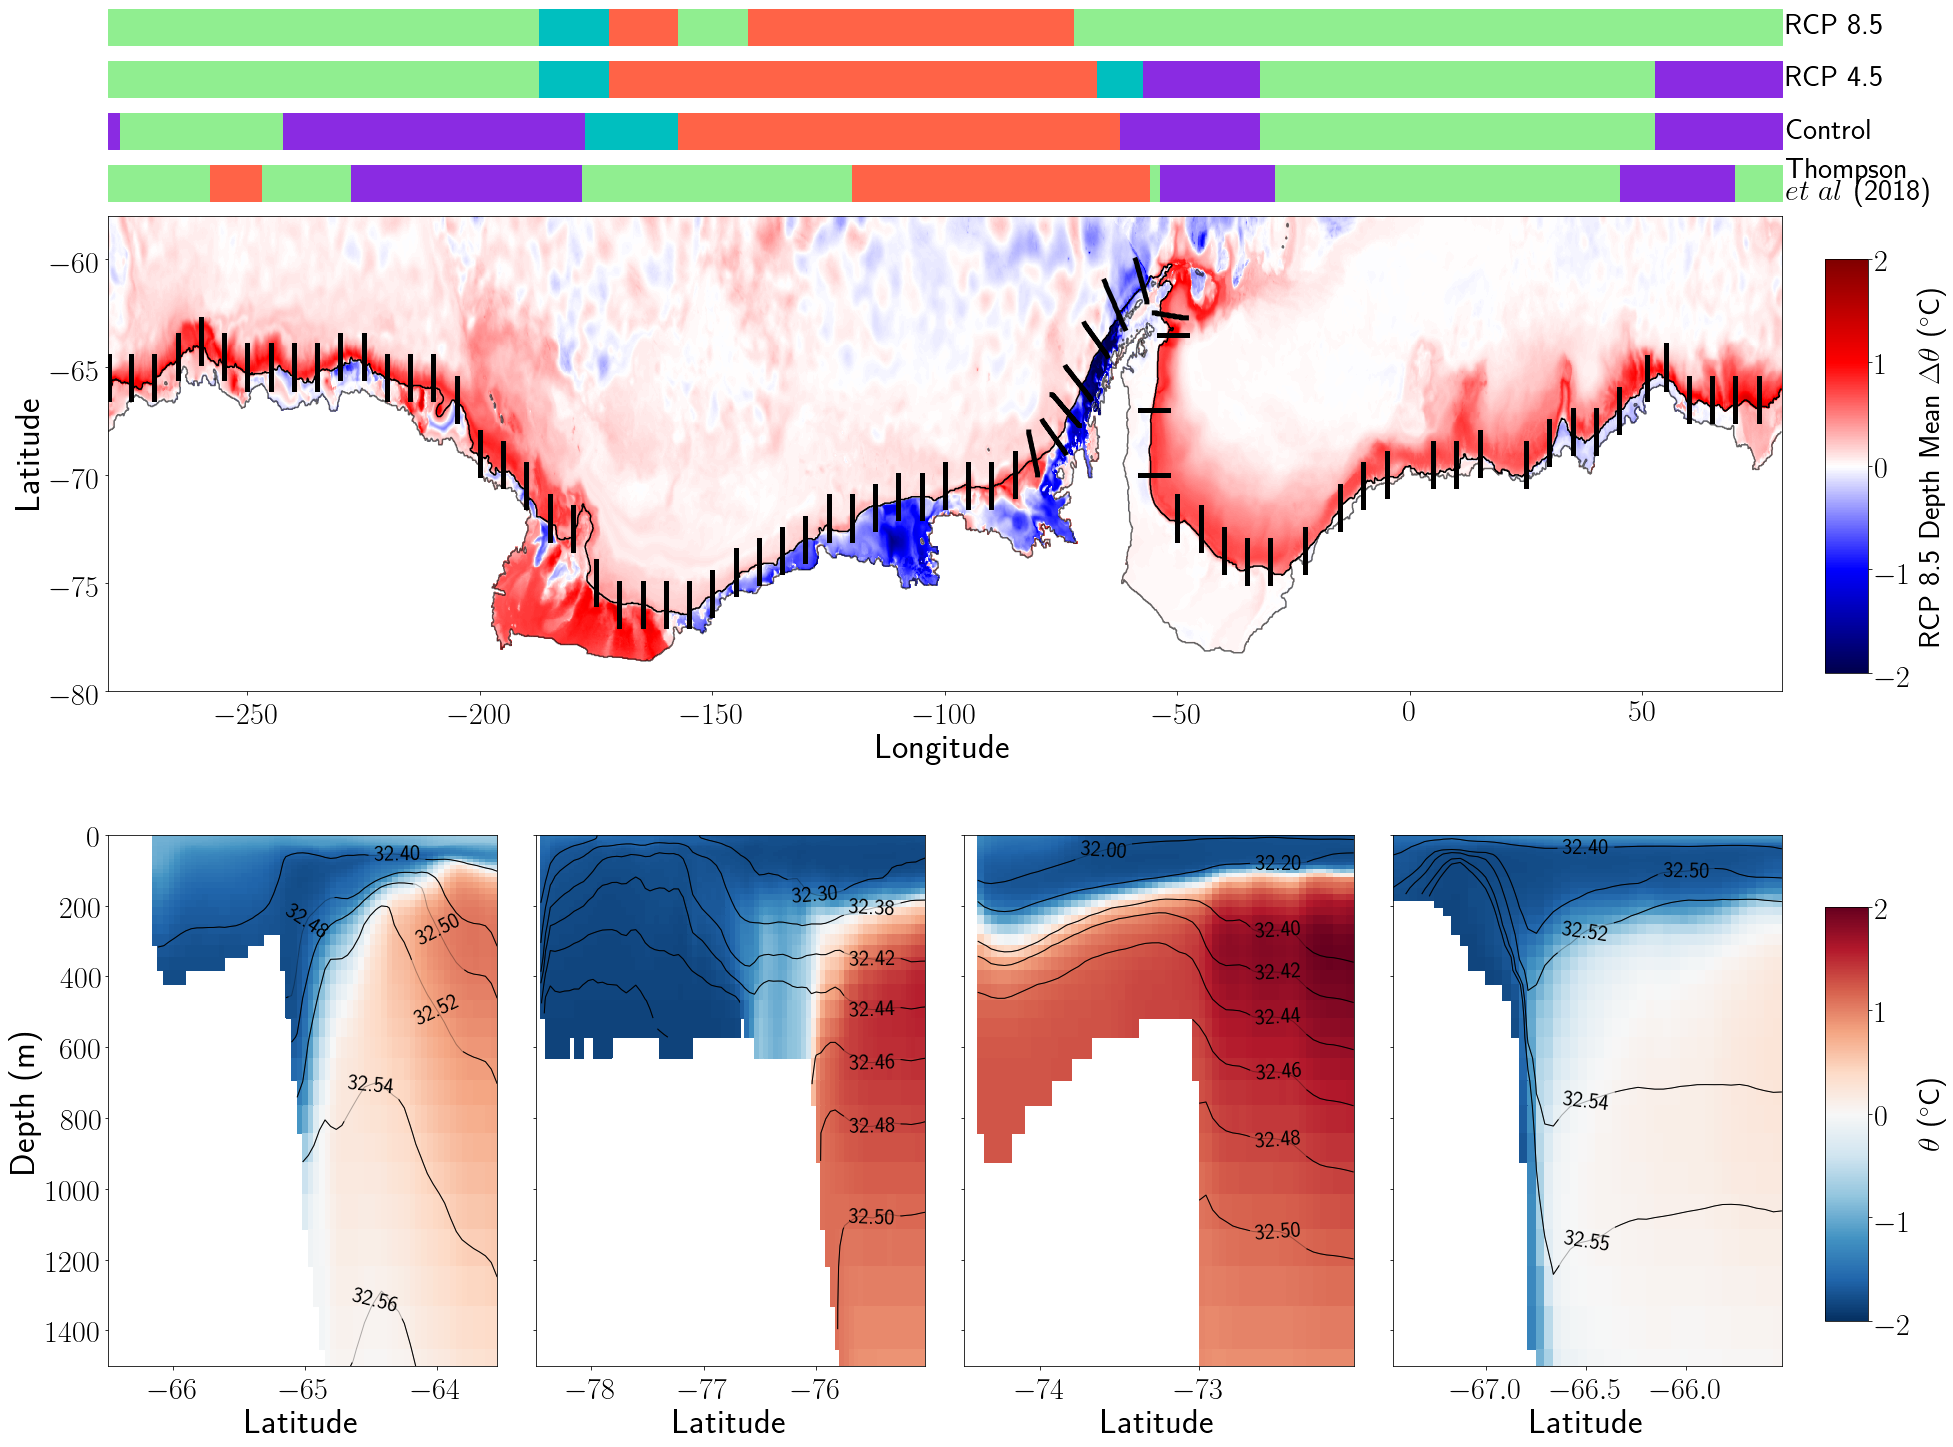

In [47]:
fig=plt.figure(1,(30,25))
gs1 = gridspec.GridSpec(5, 1, height_ratios=[1, 1, 1, 1, 12]) 
gs1.update(bottom = 0.5)

ax0 = plt.subplot(gs1[4])
ax1 = plt.subplot(gs1[3], sharex = ax0)
ax2 = plt.subplot(gs1[2], sharex = ax0)
ax3 = plt.subplot(gs1[1], sharex = ax0)
ax4 = plt.subplot(gs1[0], sharex = ax0)

anomaly_temp = temp_anomaly_transects(ax0)
ASC_strips(ax1, ax2, ax3, ax4)

gs2 = gridspec.GridSpec(1, 4) 
gs2.update(top = 0.42, wspace = 0.1)

ax6 = plt.subplot(gs2[0])
ax7 = plt.subplot(gs2[1])
ax8 = plt.subplot(gs2[2])
ax9 = plt.subplot(gs2[3])

plot = fresh_example(ax6)
cool_example(ax7)
warm_example(ax8)
dense_example(ax9)

cax = plt.axes([0.92, 0.15, 0.02, 0.23])
cbar=fig.colorbar(plot, cax = cax ,orientation='vertical')
cbar.set_label(r'$\theta$ ($^\circ$C)', fontsize = 30)

cax = plt.axes([0.92, 0.51, 0.02, 0.23])
cbar=fig.colorbar(anomaly_temp, cax = cax ,orientation='vertical')
cbar.set_label(r'RCP 8.5 Depth Mean $\Delta \theta$ ($^\circ$C)', fontsize = 30)


figurepath = 'Figures/Figure_3_ASF_temperature_anomaly.png'
fig.savefig(figurepath, dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches='tight', pad_inches=0.1,
            frameon=None)


plt.show()